# Name: Scott Blyth
# Student ID: 32501013
# Note that this will take a long time to execute

/Users/ningnong/Documents/_Monash/Honours/FIT3193/SIRD_Model/country.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  time_to_event = lambda p: (-1/p)*np.log(np.random.random())


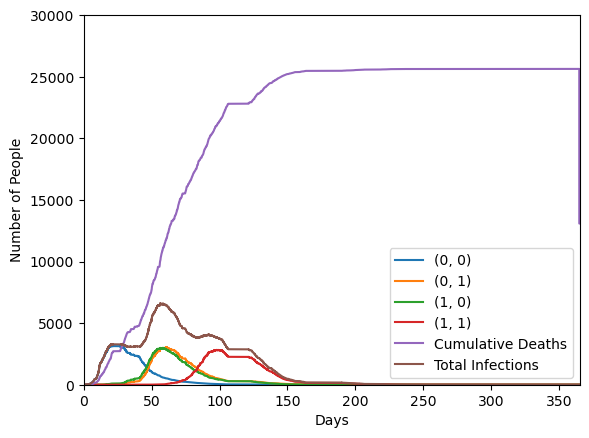

In [2]:
from country import *
from disease import disease
from scipy import stats
import numpy as np
import random
from matplotlib import pyplot

# gets the total infections plot from a grid of countries
def get_infections(grid):
    n = len(grid) 
    m = len(grid[0])
    names = []
    infection_curves = []
    for i in range(n):
        for j in range(m):
            names.append((i,j))
            c = grid[i][j]
            infections = [I for S,I,R,D in c.history]
            inf_curve = [(t, s[1]) for t,s in zip(c.times, c.history)]
            infection_curves.append(inf_curve) 
    total_infections = add_curves(infection_curves)
    return total_infections

# makes a plot of the epidmeic for a grid
def plot_grid_curves(grid, max_population): 
    n = len(grid) 
    m = len(grid[0])
    names = []
    deaths = []
    infection_curves = []
    for i in range(n):
        for j in range(m):
            names.append((i,j))
            c = grid[i][j]
            infections = [I for S,I,R,D in c.history]
            inf_curve = [(t, s[1]) for t,s in zip(c.times, c.history)]
            infection_curves.append(inf_curve)
            deaths.append([(t, s[3]) for t,s in zip(c.times, c.history)])
            plt.plot(c.times, infections) 
    cumulative_deaths = add_curves(deaths)
    total_infections = add_curves(infection_curves)
    plt.plot(cumulative_deaths[0], cumulative_deaths[1])
    plt.plot(total_infections[0], total_infections[1])
    plt.xlabel("Days")
    plt.ylabel("Number of People")
    plt.legend(names+["Cumulative Deaths", "Total Infections"]) 
    plt.xlim(0, 365)
    plt.ylim(0, max_population)
    plt.show()

# gets the maximum point on a curve 
# curve = [(t1,v1), (t2,v2), ...]
def get_peak(curve): 
    max = -math.inf 
    time = 0
    for t,v in curve: 
        if v > max:
            max = v 
            time = t
    return (time, max)

# gets the infection peaks for each country in the grid
def get_peak_grid(grid): 
    n = len(grid)
    m = len(grid[0])
    peaks = []
    for i in range(n):
        for j in range(m):
            c = grid[i][j] 
            infections = [(t, s[1]) for t,s in zip(c.times, c.history)]
            peaks.append((i, j, get_peak(infections)))
    return peaks

# gets the number of countries that were infected at all
def get_num_countries_infected(grid):
    n = len(grid)
    m = len(grid[0])
    sum = 0
    for i in range(n):
        for j in range(m):
            c = grid[i][j]
            if c.current[2]+c.current[3] > 25:
                sum += 1
    return sum

np.random.seed(100) # set seed for consistent results
random.seed(100)
# default disease
default = disease(2.3677029021650897*10**(-5),
 0.02465276930103708,
 0.052665118682770205,
 0.0001593990018386284)
countries,grid = create_grid(default, 0.0005, (2,2), True) 
grid[0][0].current[1] = 5
w = World(countries)
gillespie(w, 0,  t_max=365, max_iter=3*10**5)
plot_grid_curves(grid, 30000)

# Genetic Improvement - Finding Dangerous Diseases

In [2]:
# using a population size of 10, run the GI algorithm for 100 generations
np.random.seed(100)
random.seed(100)
env = GridEnvironemnt(0.005, 1)
population = [env.random_population() for _ in range(10)] 
population,curve,avg_curve,bests = evolve(env, population, 100)
population = sorted(population, key=lambda x : -env.fitness(x))

5402 (2.6927735462034205e-05, 0.04389875267460694, 0.09514575090578717, 0.0001358007637065884)


Text(0, 0.5, 'Fitness (Deaths)')

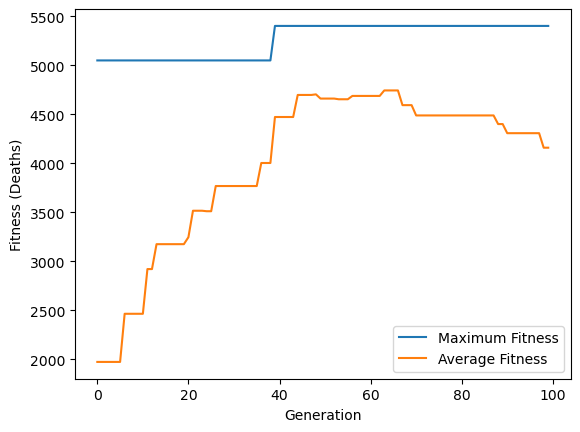

In [3]:
best = population[0]
print(env.fitness(best), best.get_params())
plt.plot(get_x(curve), curve)
plt.plot(get_x(avg_curve), avg_curve)
plt.legend(["Maximum Fitness", "Average Fitness"])
plt.xlabel("Generation")
plt.ylabel("Fitness (Deaths)")

In [25]:
np.random.seed(100)
random.seed(100)
curves = []
avg_curves=[]
env = GridEnvironemnt(0.005, 1)
for _ in range(10):
    population = [env.random_population() for _ in range(10)] 
    population,curve,avg_curve,bests = evolve(env, population, 100)
    curves.append(curve)
    avg_curves.append(avg_curve)

Text(0, 0.5, 'Fitness (Deaths)')

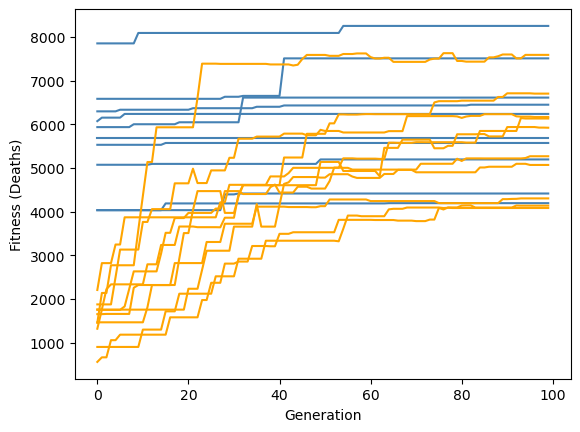

In [29]:
for c in curves:
    plt.plot(get_x(c), c, color="steelblue")
for c in avg_curves:
    plt.plot(get_x(c), c,color="orange")
plt.xlabel("Generation")
plt.ylabel("Fitness (Deaths)")

In [30]:
np.random.seed(100)
random.seed(100)
curves = []
avg_curves=[]
env = GridEnvironemnt(0.005, 1)
pop = [env.random_population() for _ in range(10)] 
for _ in range(10):
    population = pop[:]
    population,curve,avg_curve,bests = evolve(env, population, 100)
    curves.append(curve)
    avg_curves.append(avg_curve)

Text(0, 0.5, 'Fitness (Deaths)')

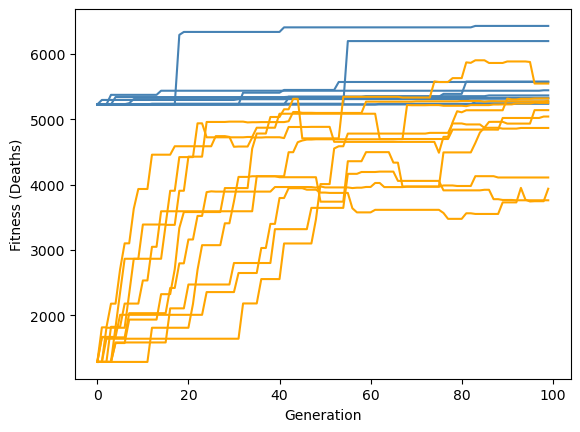

In [31]:
for c in curves:
    plt.plot(get_x(c), c, color="steelblue")
for c in avg_curves:
    plt.plot(get_x(c), c,color="orange")
plt.xlabel("Generation")
plt.ylabel("Fitness (Deaths)")

Text(0, 0.5, 'Deaths')

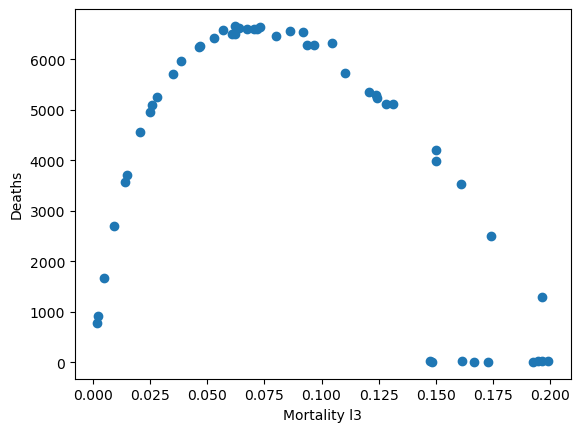

In [5]:
## morality tradeoffs
def get_deaths(countries):
    return sum(c.current[3] for c in countries)

l = np.random.uniform(low=0, high=0.2, size=(50,))
np.random.seed(100)
random.seed(100)
curve = []
for l3 in l:
    d = default.copy()
    d.l3 = l3
    countries,grid = create_grid(d, 0.0005, (1,1), False) 
    grid[0][0].current[1] = 5
    w = World(countries)
    gillespie(w, 0,  t_max=365, max_iter=3*10**5)
    curve.append((l3, get_deaths(countries)))
x = [x for x,y in curve]
y = [y for x,y in curve]
plt.scatter(x, y)
plt.xlabel("Mortality l3")
plt.ylabel("Deaths")

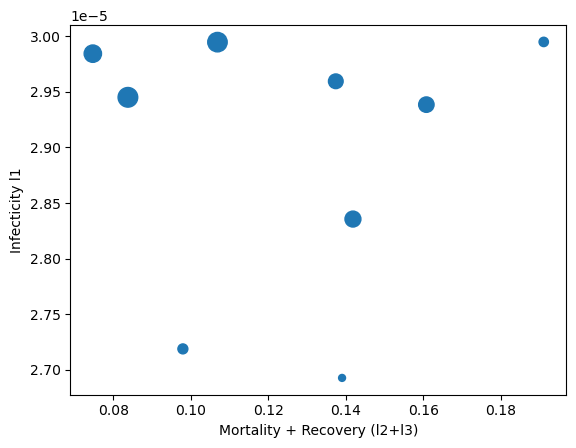

In [7]:
diseases = []
np.random.seed(100)
random.seed(100)
for _ in range(10):
    env = GridEnvironemnt(0.005, 1)
    population = [env.random_population() for _ in range(10)] 
    #evolve(env : Environment, population, iterations)

    population,curve,avg_curve,bests = evolve(env, population, 100)
    population = sorted(population, key=lambda x : -env.fitness(x))
    diseases.append(population[0])


y = [d.l1 for d in diseases]
x = [d.l2+d.l3 for d in diseases]
fitnesses = [env.fitness(d) for d in diseases]
max_fit = max(fitnesses)
min_fit = min(fitnesses)
diff = max_fit-min_fit
sizes =  [200*(env.fitness(d)-min_fit)/diff for d in diseases]
plt.scatter(x,y, sizes=sizes)
plt.xlabel("Mortality + Recovery (l2+l3)")
plt.ylabel("Infecticity l1")
plt.show() 

# RQ1 : Infection Country to Country Spread

In [12]:
np.random.seed(100)
random.seed(100)
countries,grid = create_grid(default, 0.0005, (3,3), True) 
grid[0][0].current[1] = 5
w = World(countries)
gillespie(w, 0,  t_max=365, max_iter=3*10**5)

more_infectious = default.copy()
more_infectious.l1 = 0.00004

countries,grid2 = create_grid(more_infectious, 0.0005, (3,3), True) 
grid2[0][0].current[1] = 5
w = World(countries)
gillespie(w, 0,  t_max=365, max_iter=3*10**5)

D:\_Monash 2024\Honours\FIT3191\assignment\country.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  time_to_event = lambda p: (-1/p)*np.log(np.random.random())


In [13]:
peaks = get_peak_grid(grid)
peaks2 = get_peak_grid(grid2)

Text(0, 0.5, 'Time of Peak (Days)')

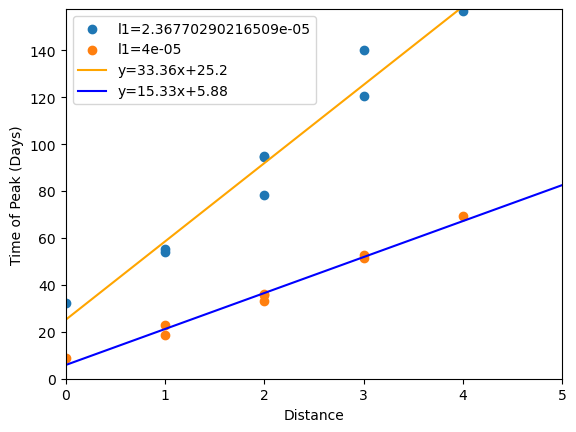

In [28]:
curve = [(i+j, peak[0]) for i,j,peak in peaks]
curve2 = [(i+j, peak[0]) for i,j,peak in peaks2]
x = [x for x,y in curve]
y = [y for x,y in curve]
x2 = [x for x,y in curve2]
y2 = [y for x,y in curve2]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope2, intercept2, r2, p2, std_err2 = stats.linregress(x2, y2)
plt.scatter(x,y)
plt.scatter(x2,y2)
plt.plot([0, max(x)+5], [intercept, slope*(max(x)+5)+intercept],
        color="orange")
plt.plot([0, max(x2)+5], [intercept2, slope2*(max(x2)+5)+intercept2],
        color="blue")
plt.legend([f"l1={default.l1}", f"l1={more_infectious.l1}",
           f"y={round(slope,2)}x+{round(intercept,2)}", 
            f"y={round(slope2, 2)}x+{round(intercept2,2)}"])
plt.ylim(0, max(y)+1)
plt.xlim(0, max(x)+1)
plt.xlabel("Distance")
plt.ylabel("Time of Peak (Days)")

In [26]:
print(slope, intercept, r**2)
print(slope2, intercept2, r2**2)

33.361764328161534 25.204635823350202 0.9616799153863616
15.328740280999487 5.880992938180448 0.9876597652426617


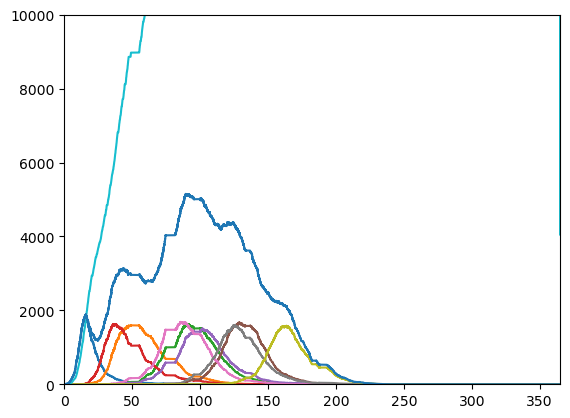

In [9]:
plot_grid_curves(grid,10000)

In [10]:
np.random.seed(100)
random.seed(100)
countries,grid = create_grid(best, 0.005, (2,2), True) 
grid[0][0].current[1] = 5
w = World(countries)
gillespie(w, 0,  t_max=365, max_iter=3*10**5)

In [11]:
infections = get_infections(grid)
print(infections[0][-1])

364.9997571185356


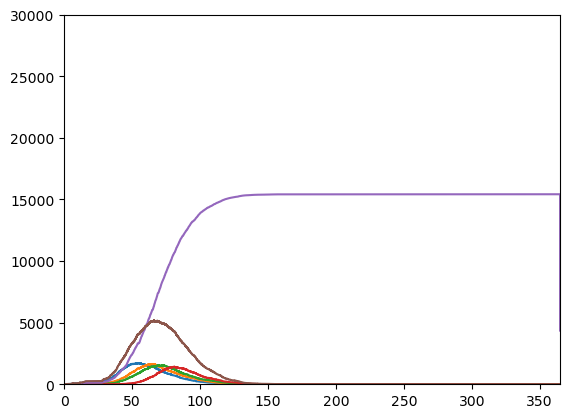

In [12]:
plot_grid_curves(grid, 30000)

In [4]:
# locates the end of the global pandemic
def find_end(grid): 
    infections = get_infections(grid)
    started = False
    for i,v in enumerate(infections[1]): 
        if not started and v >= 500:
            started = True
        if started and v < 10:
            return infections[0][i]
pandemic_length = []
num_countries = []
np.random.seed(100)
random.seed(100)
l_sample = np.random.uniform(low=0.0005, high=0.001, size=(20,))
for l in l_sample:
    countries,grid = create_grid(default, l, (2,2), True) 
    grid[0][0].current[1] = 5
    w = World(countries)
    gillespie(w, 0,  t_max=365, max_iter=3*10**5)
    pandemic_length.append(find_end(grid))
    num_countries.append(get_num_countries_infected(grid))
    

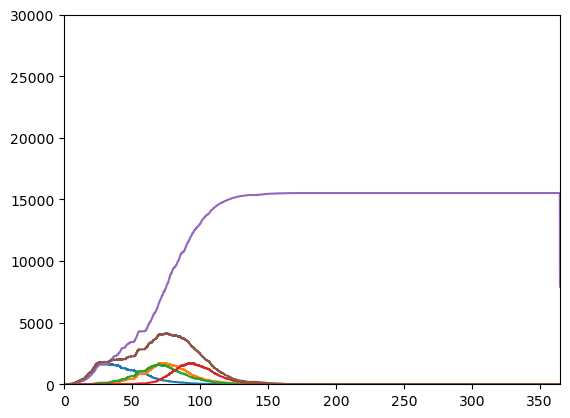

Text(0.5, 0, 'Movement between Countries')

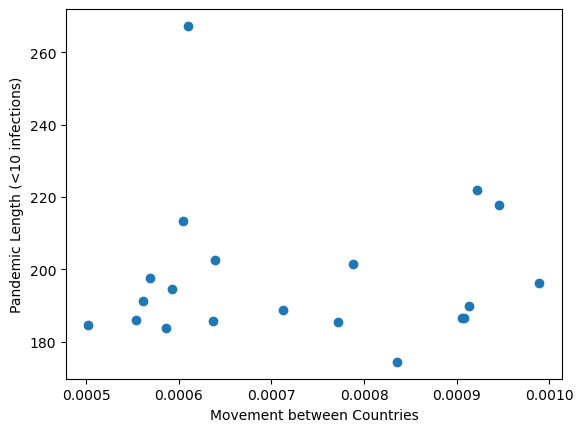

In [8]:
np.random.seed(100)
random.seed(100)
x=l_sample
plt.scatter(x, pandemic_length)
plt.ylabel("Pandemic Length (<10 infections)")
plt.xlabel("Movement between Countries")
plt.show()

In [8]:
peaks = []
np.random.seed(100)
random.seed(100)
for _ in range(3):
    for l1 in np.arange(0.00001, 0.00004, 0.000005):
        more_infectious = default.copy()
        more_infectious.l1 = l1

        countries,grid2 = create_grid(more_infectious, 0.0005, (2,2), True) 
        grid2[0][0].current[1] = 5
        w = World(countries)
        gillespie(w, 0,  t_max=365, max_iter=3*10**5)
        infections = get_infections(grid2)
        infections = [(x,y) for x,y in zip(infections[0], infections[1])]
        peak = get_peak(infections)
        peaks.append((l1, peak))

-3985936.0492619653 163.33018706031953 0.3103620957655087


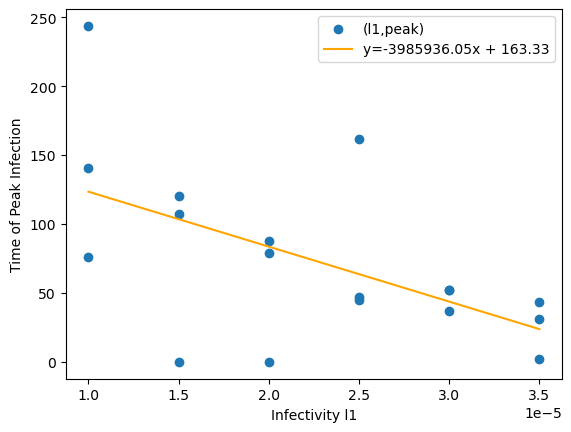

In [9]:
times = [y[0] for x,y in peaks]
x = [x for x,y in peaks]
plt.scatter(x, times)
slope, intercept, r, p, std_err = stats.linregress(x, times) 
plt.plot([min(x), max(x)], [slope*min(x)+intercept, slope*max(x)+intercept], color="orange")
plt.legend(["(l1,peak)", f"y={round(slope,2)}x + {round(intercept,2)}"])
plt.xlabel("Infectivity l1")
plt.ylabel("Time of Peak Infection")
print(slope, intercept, r**2)

-2202420.5314586745 89.78427377439927 0.7446461812969092


Text(0, 0.5, 'Standard Deviation of Time of Peak Infection')

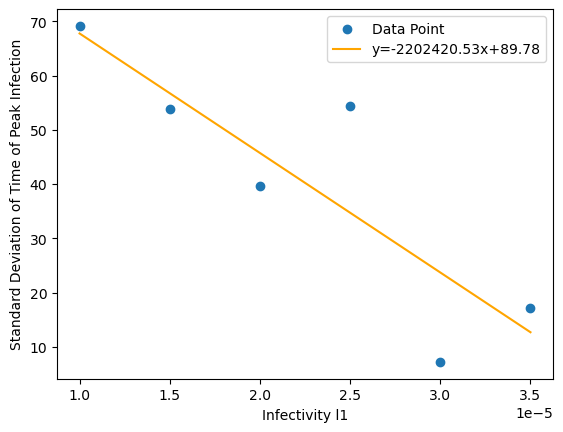

In [10]:
std = {}
for l1,v in peaks:
    if l1 not in std:
        std[l1] = [v[0]]
    else:
        std[l1].append(v[0])

x= [x for x,y in std.items()]
y = [np.std(y) for x,y in std.items()]
plt.scatter(x,y)
slope, intercept, r, p, std_err = stats.linregress(x, y)
plt.plot([min(x), max(x)], [min(x)*slope+intercept, max(x)*slope+intercept], color="orange")
plt.legend(["Data Point", f"y={round(slope,2)}x+{round(intercept,2)}"])
print(slope, intercept, r**2)
plt.xlabel("Infectivity l1")
plt.ylabel("Standard Deviation of Time of Peak Infection")

# Lockdown Graphs

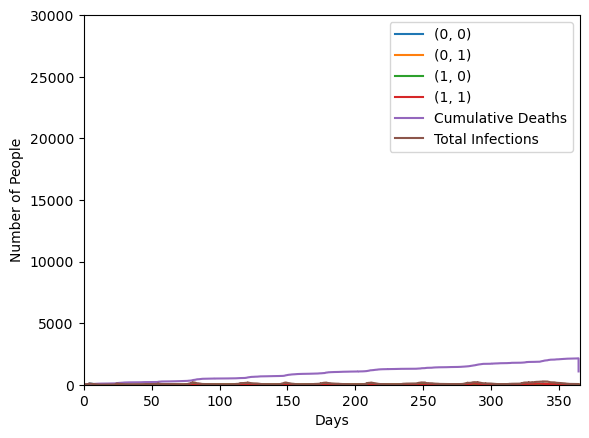

In [4]:
np.random.seed(100)
random.seed(100)
countries,grid = create_grid(default, 0.001, (2,2), True, lockdown=True, lockdown_threshold=0.01, lifiting_threshold=0.001) 
grid[0][0].current[1] = 5
w = World(countries)
gillespie(w, 0,  t_max=365, max_iter=3*10**5)
plot_grid_curves(grid, 30000)

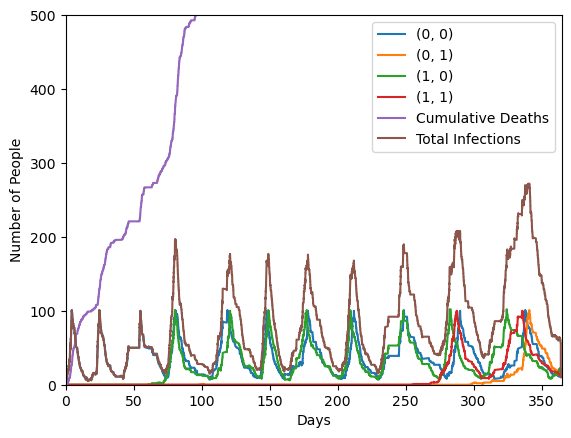

In [5]:
plot_grid_curves(grid, 500)

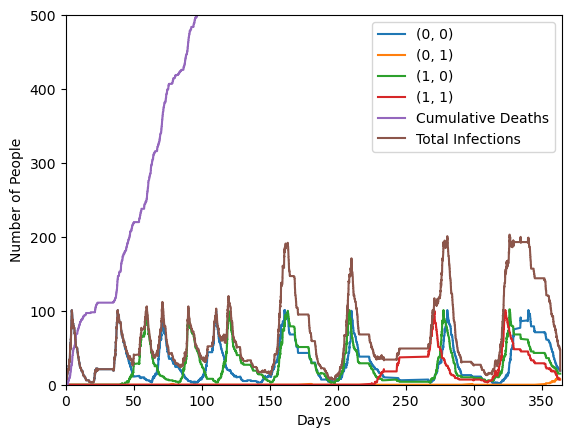

In [7]:
np.random.seed(100)
random.seed(100)
countries,grid = create_grid(default, 0.001, (2,2), True, lockdown=True, lockdown_threshold=0.01, lifiting_threshold=0.0005) 
grid[0][0].current[1] = 5
w = World(countries)
gillespie(w, 0,  t_max=365, max_iter=3*10**5)
plot_grid_curves(grid, 500)

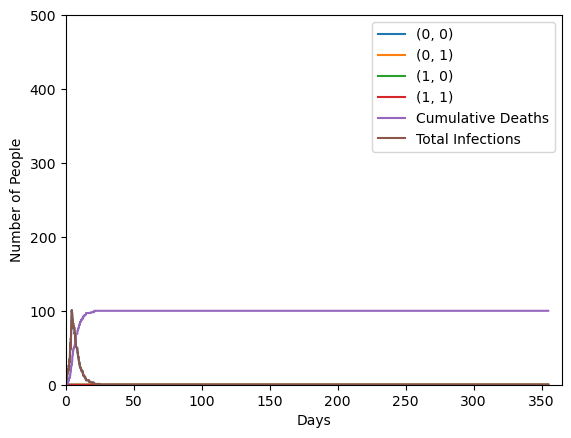

In [8]:
np.random.seed(100)
random.seed(100)
countries,grid = create_grid(default, 0.001, (2,2), True, lockdown=True, lockdown_threshold=0.01, lifiting_threshold=0.0001) 
grid[0][0].current[1] = 5
w = World(countries)
gillespie(w, 0,  t_max=365, max_iter=3*10**5)
plot_grid_curves(grid, 500)

In [4]:
diseases = []
np.random.seed(100)
random.seed(100)
for _ in range(10):
    env = GridEnvironemnt(0.005, 1)
    population = [env.random_population() for _ in range(10)] 
    #evolve(env : Environment, population, iterations)

    population,curve,avg_curve,bests = evolve(env, population, 20)
    population = sorted(population, key=lambda x : -env.fitness(x))
    diseases.append(population[0])

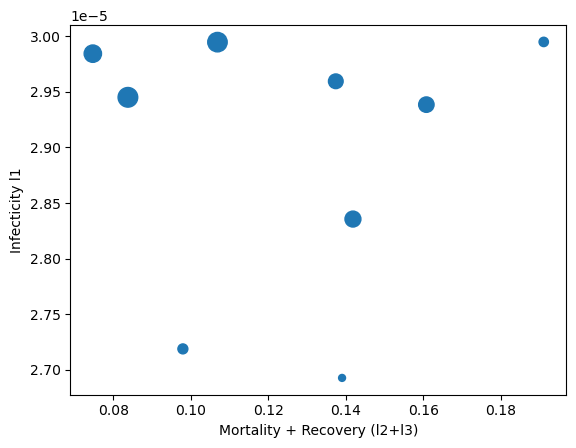

In [9]:
y = [d.l1 for d in diseases]
x = [d.l2+d.l3 for d in diseases]
fitnesses = [env.fitness(d) for d in diseases]
max_fit = max(fitnesses)
min_fit = min(fitnesses)
diff = max_fit-min_fit
sizes =  [200*(env.fitness(d)-min_fit)/diff for d in diseases]
plt.scatter(x,y, sizes=sizes)
plt.xlabel("Mortality + Recovery (l2+l3)")
plt.ylabel("Infecticity l1")
plt.show() 

In [18]:
peaks = []
np.random.seed(100)
random.seed(100)
for _ in range(3):
    for l1 in np.arange(0.00001, 0.00004, 0.000005):
        more_infectious = default.copy()
        more_infectious.l1 = l1

        countries,grid2 = create_grid(more_infectious, 0.0005, (2,2), True) 
        grid2[0][0].current[1] = 5
        w = World(countries)
        gillespie(w, 0,  t_max=365, max_iter=3*10**5)
        infections = get_infections(grid2)
        infections = [(x,y) for x,y in zip(infections[0], infections[1])]
        peak = get_peak(infections)
        peaks.append((l1, peak))


In [ ]:
times = [y[0] for x,y in peaks]
x = [x for x,y in peaks]
plt.scatter(x, times)
slope, intercept, r, p, std_err = stats.linregress(x, times) 
plt.plot([min(x), max(x)], [slope*min(x)+intercept, slope*max(x)+intercept], color="orange")
plt.legend(["(l1,peak)", f"y={round(slope,2)}x + {round(intercept,2)}"])
plt.xlabel("Infectivity l1")
plt.ylabel("Time of Peak Infection")
print(slope, intercept, r**2)

-2202420.5314586745 89.78427377439927 0.7446461812969092


Text(0, 0.5, 'Standard Deviation of Time of Peak Infection')

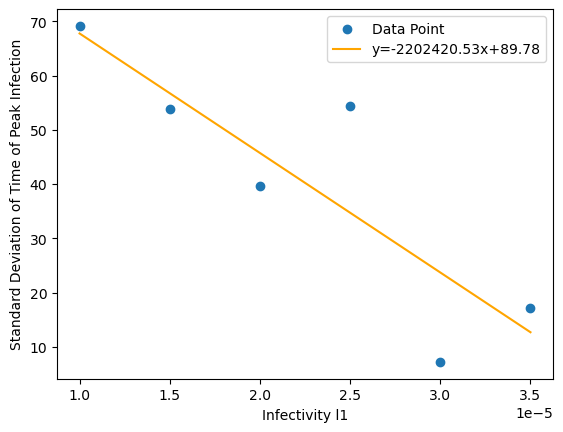

In [49]:
std = {}
for l1,v in peaks:
    if l1 not in std:
        std[l1] = [v[0]]
    else:
        std[l1].append(v[0])

x= [x for x,y in std.items()]
y = [np.std(y) for x,y in std.items()]
plt.scatter(x,y)
slope, intercept, r, p, std_err = stats.linregress(x, y)
plt.plot([min(x), max(x)], [min(x)*slope+intercept, max(x)*slope+intercept], color="orange")
plt.legend(["Data Point", f"y={round(slope,2)}x+{round(intercept,2)}"])
print(slope, intercept, r**2)
plt.xlabel("Infectivity l1")
plt.ylabel("Standard Deviation of Time of Peak Infection")